In [1]:
from py4j.java_gateway import JavaGateway
import matplotlib.pyplot as plt

gateway = JavaGateway()

print ("load data ...")
# read infrastructure, rollingstocks and timetable data

infrastructure_path = "C:\\Projects\\2011 RailSys 7 Data\\rs_2loops\\var-2019"
rollingstocks_path = "C:\\Projects\\2011 RailSys 7 Data\\rs_2loops\\global\\dat"
timetable_path_prefix = "C:\\Projects\\2011 RailSys 7 Data\\rs_2loops\\var-2019-S"

load data ...


In [6]:
for scenario in range(3):
    timetable_path = timetable_path_prefix + str(scenario)
    
    print("load scenario: " + str(scenario) + " ...")
        
    timetable_entry = gateway.createTimetableSimulationEntry(
        infrastructure_path, rollingstocks_path, timetable_path)
    simulator = timetable_entry.getSimulator()
    
    trips = timetable_entry.getUtilities().getTrips(-1, -1)
    print("    number of trips: ", len(trips)) # 2. get number of trips
    print("    run simulation ...")
    simulator.run()
    
    for train_simulator in simulator.getTrainSimulators():
        print("Scenario " + str(scenario) + ": Train Number: " + train_simulator.getTrain().getNumber())
    
        arrive_deviations = train_simulator.getArriveDeviations()
        departure_deviations = train_simulator.getDepartureDeviations()
    
        index = 0
        for trip_element in train_simulator.getTripSection().getTripElements():
            actual_arrive = trip_element.getArriveTime().add(arrive_deviations[index]) # 12. Actual arrival time
            actual_departure = trip_element.getDepartureTime().add(departure_deviations[index]) # 9. Actual departure time
        
            print("    At station: {0}".format(trip_element.getStation().getDescription()))
            print("    Actual arrive time: {0}, Deviation: {1}".format(actual_arrive, arrive_deviations[index]))
            print("    Actual departure time : {0}, Deviation: {1}".format(actual_departure, departure_deviations[index]))
        
            index += 1
    
        #break

load scenario: 0 ...
    number of trips:  10
    run simulation ...
Scenario 0: Train Number: 110
    At station: west station
    Actual arrive time: 02:39:51.976 d:0, Deviation: Duration [Seconds=111.976]
    Actual departure time : 02:41:51.976 d:0, Deviation: Duration [Seconds=111.976]
    At station: northwest station
    Actual arrive time: 02:53:47.335 d:0, Deviation: Duration [Seconds=30.335]
    Actual departure time : 02:53:47.335 d:0, Deviation: Duration [Seconds=30.335]
    At station: middel station
    Actual arrive time: 03:09:52.723 d:0, Deviation: Duration [Seconds=93.723]
    Actual departure time : 03:09:52.723 d:0, Deviation: Duration [Seconds=93.723]
    At station: southwest station
    Actual arrive time: 03:27:02.325 d:0, Deviation: Duration [Seconds=257.325]
    Actual departure time : 03:27:02.325 d:0, Deviation: Duration [Seconds=257.325]
    At station: west station
    Actual arrive time: 03:40:48.562 d:0, Deviation: Duration [Seconds=294.562]
    Actual d

    Actual departure time : 02:54:03.725 d:0, Deviation: Duration [Seconds=344.725]
    At station: southwest station
    Actual arrive time: 03:15:40.670 d:0, Deviation: Duration [Seconds=775.670]
    Actual departure time : 03:15:40.670 d:0, Deviation: Duration [Seconds=775.670]
    At station: west station
    Actual arrive time: 03:29:26.907 d:0, Deviation: Duration [Seconds=812.907]
    Actual departure time : 03:31:26.907 d:0, Deviation: Duration [Seconds=812.907]
load scenario: 1 ...
    number of trips:  10
    run simulation ...
Scenario 1: Train Number: 110
    At station: west station
    Actual arrive time: 02:39:51.976 d:0, Deviation: Duration [Seconds=111.976]
    Actual departure time : 02:41:51.976 d:0, Deviation: Duration [Seconds=111.976]
    At station: northwest station
    Actual arrive time: 02:53:47.335 d:0, Deviation: Duration [Seconds=30.335]
    Actual departure time : 02:53:47.335 d:0, Deviation: Duration [Seconds=30.335]
    At station: middel station
    Ac

    number of trips:  10
    run simulation ...
Scenario 2: Train Number: 110
    At station: west station
    Actual arrive time: 02:39:51.976 d:0, Deviation: Duration [Seconds=111.976]
    Actual departure time : 02:41:51.976 d:0, Deviation: Duration [Seconds=111.976]
    At station: northwest station
    Actual arrive time: 02:53:47.335 d:0, Deviation: Duration [Seconds=30.335]
    Actual departure time : 02:53:47.335 d:0, Deviation: Duration [Seconds=30.335]
    At station: middel station
    Actual arrive time: 03:09:52.723 d:0, Deviation: Duration [Seconds=93.723]
    Actual departure time : 03:09:52.723 d:0, Deviation: Duration [Seconds=93.723]
    At station: southwest station
    Actual arrive time: 03:27:02.325 d:0, Deviation: Duration [Seconds=257.325]
    Actual departure time : 03:27:02.325 d:0, Deviation: Duration [Seconds=257.325]
    At station: west station
    Actual arrive time: 03:40:48.562 d:0, Deviation: Duration [Seconds=294.562]
    Actual departure time : 03:42

Running time and velocity for last scenario:
Train number:  110


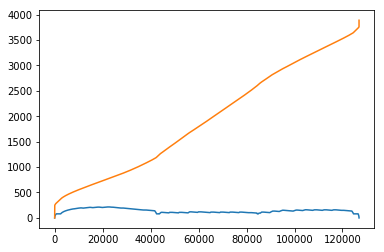

Train number:  100


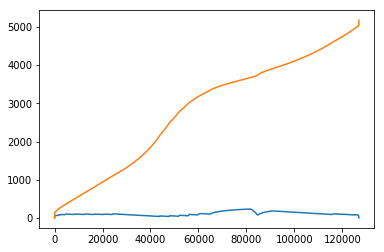

Train number:  200


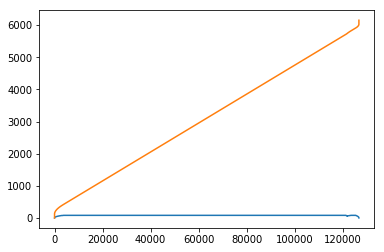

Train number:  102


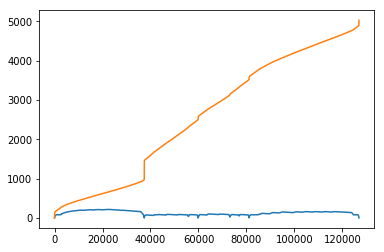

Train number:  202


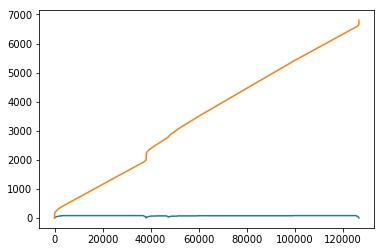

Train number:  104


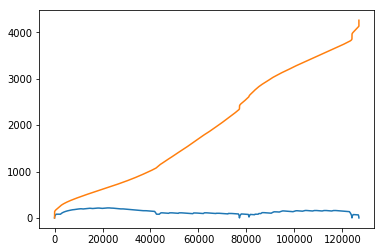

Train number:  204


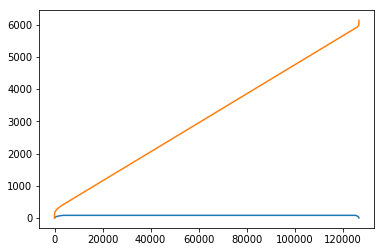

Train number:  106


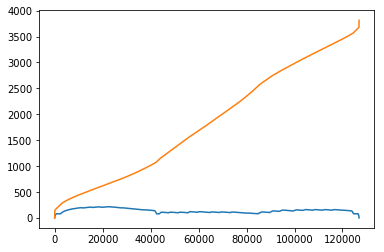

Train number:  206


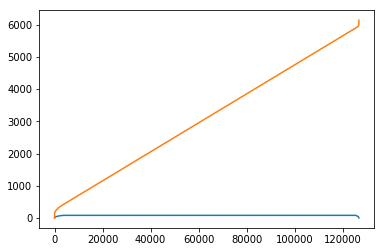

Train number:  108


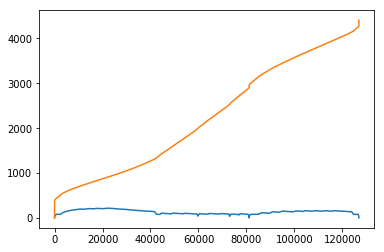

In [3]:
print("Running time and velocity for last scenario:")

for train_simulator in simulator.getTrainSimulators():
    print("Train number: ", train_simulator.getTrain().getNumber())
    # inside a course there are many DiscretePoint, which describes running dynamics
    course = train_simulator.getWholeCoursePoints()
    
    distances = []
    velocities = []
    times = []
    meter = 0
    time = 0
            
    for point in course:
        meter += point.getDistance().getMeter()
        time += point.getDuration().getTotalSeconds()
        distances.append(meter);
        times.append(time)
        velocities.append(point.getVelocity().getKilometerPerHour())
    
    plt.plot(distances, velocities) # 22. 24. Location of the train (from start station) and Velocity(Scheduled running trajectory)
    plt.plot(distances, times)
    plt.show()
    
    # break # only print the first one

In [4]:
# 17. Scheduled waiting time (after timetable simulation)
print("Total waiting time in seconds: ", simulator.getDispatchingSystem().getTotalPending().getTotalSeconds())

Total waiting time in seconds:  6798.699
